In [1]:
import numpy as np
import keras.models
from keras.models import model_from_json
from scipy.misc import imread, imresize,imshow
import cv2

Using TensorFlow backend.


In [37]:
json_file = open('model.json','r')

In [38]:
loaded_model_json = json_file.read()
json_file.close()

In [39]:
loaded_model = model_from_json(loaded_model_json)
#load woeights into new model
loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

Loaded Model from disk


In [40]:
#compile and evaluate loaded model
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [2]:
x = cv2.imread('output.png',0)
print(x.shape)
x = np.invert(x)
x = cv2.resize(x,(28,28))
cv2.imshow('image',x)
x = x.reshape(1,28,28,1)

(280, 280)


In [49]:
out = loaded_model.predict(x)

In [50]:
out

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [51]:
np.argmax(out,axis=1)

array([5])

In [1]:
imgData = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAARd0lEQVR4Xu3db2iV9RvH8Wvrz8xFpemcZYVESFhm9m86sgdSElFKD4xgTRDBooiklFDzgWWRGhhBkRBhVkgRNIkw7VHWFski/zyQiCGF4Uj7h9mMcj++8ttQp7uu+3hf27nv632e7jrf7329ri8fzrZz7lPT29vbKzwQQAABB4EaAsZBlSURQOCEAAHDQUAAATcBAsaNloURQICA4QwggICbAAHjRsvCCCBAwHAGEEDATYCAcaNlYQQQIGA4Awgg4CZAwLjRsjACCBAwnAEEEHATIGDcaFkYAQQIGM4AAgi4CRAwbrQsjAACBAxnAAEE3AQIGDdaFkYAAQKGM4AAAm4CBIwbLQsjgAABwxlAAAE3AQLGjZaFEUCAgOEMIICAmwAB40bLwgggQMBwBhBAwE2AgHGjZWEEECBgOAMIIOAmQMC40bIwAggQMJwBBBBwEyBg3GhZGAEECBjOAAIIuAkQMG60LIwAAgQMZwABBNwECBg3WhZGAAEChjOAAAJuAgSMGy0LI4AAAcMZQAABNwECxo2WhRFAgIDhDCCAgJsAAeNGy8IIIEDAcAYQQMBNgIBxo2VhBBAgYDgDCCDgJkDAuNGyMAIIEDCcAQQQcBMgYNxoWRgBBAgYzgACCLgJEDButCyMAAIEDGcAAQTcBAgYN1oWRgABAoYzYBZYsmSJvPfee3Lw4METz2lsbJSWlhZZs2aNeQ0KYwkQMLHmXXG3zc3N0t7efsbnz5gxQ7766quK1+aJ5RUgYMo729w6e+GFF+S5554bdL1Us3z58tz2ZKFyCBAw5ZijaxfpV6Hu7u5B9xg3blz/r06uF8PihRIgYAo1ruG52NraWunt7R1085qaGjl+/PjwXCC7Vq0AAVO1o6meC0vhYXloIWRZg5pyCRAw5ZqnSzcEjAtriEUJmBBjrrzJQ4cOydixY00L8ArGxBSqiIAJNe7sze7YsUNmzpypPpG/wahEIQsImJBjtze9YcMGWbRokfqESy65RP744w+1joJYAgRMrHln7nbx4sWyfv169Xl33HGHfP3112odBbEECJhY887c7ZQpU2TPnj3q85YtWyarV69W6yiIJUDAxJp35m7r6+vl6NGj6vM2btwora2tah0FsQQImFjzztTtL7/8Ig0NDabndHR0SFNTk6mWojgCBEycWWfu9IsvvpC77rrL9LzDhw/L6NGjTbUUxREgYOLMOnOnb775pjz66KPq89KvUUeOHFHrKIgnQMDEm7m546eeekpeffVVtf7mm2+Wb7/9Vq2jIJ4AARNv5uaOb7nlFlNw8B8kM2m4QgIm3MjtDV988cXy119/qU/gP0gqUdgCAibs6AdvPP3RdsyYMSaddKe76dOnm2opiiVAwMSat7nb9K5ca2ikD0Refvnl5rUpjCNAwMSZdaZON23aZHrj3EUXXWR6I16mzSkujQABU5pR5tvIypUr5fnnn1cXveGGG0wfJVAXoqCUAgRMKcd67k09/PDDsnnzZnWhJ5980vSvbHUhCkopQMCUcqzn3tStt94qnZ2d6kKvv/66PPbYY2odBTEFCJiYc1e7vvTSS+XPP/9U6z7//HOZNWuWWkdBTAECJubcB+26q6tLrr32WpPM/v375ZprrjHVUhRPgICJN3O1461bt8q9996r1qVXOb///rtaR0FcAQIm7uzP2nn6/FH6HJL24C52mhA/J2A4AwMEHn/8cUl/vNUe6QZT6WMCPBA4mwABw9kYIDB16lTZtWuXKrNq1Sr1O6vVRSgotQABU+rxVtac9TaZ77//vqT3y/BAgFcwnAGTwG+//Wa+M90333wjt912m2ldimIK8Aom5tzP2vXOnTvl9ttvN6n8+uuvMmrUKFMtRTEFCJiYcz9r1+njAZZfe0aOHGm6Vwy8sQUImNjzH9B9+m6jFStWqCo33XSTfPfdd2odBbEFCJjY8x/Q/YIFC+Ttt99WVdLNwN944w21joLYAgRM7PkP6P7666+Xffv2qSrr1q2Tp59+Wq2jILYAARN7/gO6TzeQ6unpUVU++ugjefDBB9U6CmILEDCx539K9729vVJbW2sSSV9Tkr6uhAcCgwkQMJyPfoEsXxWb3i9z2WWXoYfAoAIEDAekXyD97SX9DUZ71NXVmX6N0tbh5+UXIGDKP2Nzh19++aXceeedav2ECRPkp59+UusoQICA4Qz0C7S1tcncuXNVkebmZklhxAMBTYCA0YQC/fytt96ShQsXqh3PmTNHPv74Y7WOAgQIGM5Av8DLL78szz77rCqS3oyXwogHApoAAaMJBfr50qVLZe3atWrHqS6FEQ8ENAECRhMK9HPrxwTWrFkjS5YsCSRDq5UKEDCVypXweelvK1u2bFE7S78epTDigYAmQMBoQoF+nv471N7ernac/tv0wAMPqHUUIEDAcAb6BdL7Ww4cOKCKpH9RpzDigYAmQMBoQoF+PmLECDl27JjacXrH76RJk9Q6ChAgYDgDJwSy3Is3fWZpzJgxyCGgChAwKlGMgiz34k2fuuaBgEWAgLEoBajhXrwBhjwMLRIww4BejVta78U7efJk2bt3bzW2wDVVoQABU4VDGY5Lsr7JjnvxDsd0irsnAVPc2eV65dyLN1dOFvu/AAHDUTghwL14OQgeAgSMh2oB16ypqTFdNffiNTFRxCsYzkCfQHd3tzQ2NppAuBeviYkiAoYz0Cewe/duSd/UqD3Sr1FHjx7Vyvg5Av0C/IrEYZDt27fLPffco0pMnDhRurq61DoKEOgTIGA4C7Jp0yZpbW1VJWbPni1bt25V6yhAgIDhDPQLpK+BtdxAKoXQxo0bkUPALMArGDNVeQtTuKSQ0R6pLt3NjgcCVgECxipV4rr0yiT9mqQ9+MJ7TYifny5AwHAmJP1tZdu2bapECqGWlha1jgIE+BsMZ6Bf4OqrrzZ9U2MKobvvvhs5BMwCvIIxU5W30Honu/R+mRtvvLG8EHSWuwABkztpsRY8dOiQjB071nTR6R2/DQ0NplqKEEgCBEzwc7Bjxw6ZOXOmSYE72ZmYKDpJgIAJfhw2bNggixYtUhXq6+vlyJEjah0FCJwsQMAEPw+LFy+W9evXqwrTpk2Tzs5OtY4CBAgYzkC/QPqQY/rjrfZYtmyZpNtq8kAgiwCvYLJolbB25MiR8vfff6udpY8IWD6vpC5EQSgBAibUuE9tNv3Rtra21iTQ0dEhTU1NplqKEOgTIGACn4WDBw/K+PHjTQKHDx+W0aNHm2opQoCA4QzIrl27ZOrUqapEXV2d9PT0qHUUIHC6AK9gAp+J9Nb/9Dkk7XHVVVfJjz/+qJXxcwQGCBAwgQ/FO++8I/Pnz1cF0t3uPvvsM7WOAgR4BcMZ6BdYu3atLF26VBV55JFHJIURDwSyCvAKJqtYieqfeeYZeeWVV9SOUl0KIx4IZBUgYLKKlag+vTJ599131Y640ZRKRMFZBAiYwEcj/W0lfaOA9uBGU5oQPz+bAAET+Gxcd9118sMPP6gC3GhKJaKAVzCcgdMFrN9Hnd4vM2XKFAARyCzAK5jMZOV5gvX7qNM7fseNG1eexulkyAQImCGjrr6NrAHDjaaqb3ZFuSICpiiTcrhOAsYBlSVPESBgAh8IAibw8IeodQJmiKCrcRsCphqnUq5rImDKNc9M3RAwmbgorkCAgKkArQxPSe9/Se+DsTz4I69FiZozCRAwQc/Fhx9+KPPmzTN1T8CYmCg6gwABE/RYLF++XF588UW1e76uRCWiYBABAibo8Whubpb29na1++nTp5vq1IUoCClAwIQcu4j12wTSV5WkryzhgUAlAgRMJWoleI71P0hbtmyR+++/vwQd08JwCBAww6FeBXtaA6arq0smTpxYBVfMJRRRgIAp4tRyuGZrwPAfpBywAy9BwAQdviVgUs3x48eDCtF2HgIETB6KBVyDgCng0Ap4yQRMAYeWxyUTMHkosoYmQMBoQiX9OQFT0sFWWVsETJUNZKguh4AZKunY+xAwQedvCZhEw3+Rgh6QnNomYHKCLNIyfJK6SNMq9rUSMMWeX0VXzyepK2LjSRUIEDAVoBX9KXySuugTLM71EzDFmVVuV5q+42jPnj3qenySWiWiQBEgYAIekREjRsixY8fUzvkktUpEAQHDGThZIMsfePkkNWfnXAV4BXOuggV7fpY/8PJJ6oINtwovl4CpwqF4XpL1D7x1dXXS09PjeSmsHUCAgAkw5JNbtN4qc9q0adLZ2RlMh3bzFiBg8hat8vW4VWaVD6hkl0fAlGygg7WT3vZfW1tr6pg/8JqYKOK/SJyBPoF086jzzjvPBMIfeE1MFBEwnIE+gSyvYPiQI+cmDwF+RcpDsSBrfP/99zJp0iTT1RIwJiaKeAXDGegT+OCDD+Shhx4ygRAwJiaKCBjOQJ9A+gK1l156SQXh62JVIgqMAvyKZIQqQ9mMGTOko6NDbYUPOapEFBgFCBgjVBnK0rtz//nnH7UVPuSoElFgFCBgjFBlKLPeJpP3wJRh2tXRAwFTHXNwv4q5c+dKW1ubaR/eA2NiosggQMAYkMpQcsEFF8i///6rtsK3OapEFGQQIGAyYBW51PrrUUNDg3R3dxe5Va69igQImCoahuelWAPmiSeekNdee83zUlg7kAABE2TY1oDhDXZBDsQQtUnADBH0cG9DwAz3BGLuT8AEmfv5558v//3336Ddpk9aW/4QHISMNnMQIGByQCzCEvfdd598+umng15qqvnkk0+K0A7XWBABAqYgg8rjMq+88kr5+eefz7jUFVdcIQcOHMhjG9ZAoF+AgAl2GObNm3fiDXd9Hxm48MILZc6cOZI+ac0DgbwFCJi8RVkPAQR4BcMZQAABfwFewfgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX8BAsbfmB0QCCtAwIQdPY0j4C9AwPgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX8BAsbfmB0QCCtAwIQdPY0j4C9AwPgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX8BAsbfmB0QCCtAwIQdPY0j4C9AwPgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX8BAsbfmB0QCCtAwIQdPY0j4C9AwPgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX8BAsbfmB0QCCtAwIQdPY0j4C9AwPgbswMCYQUImLCjp3EE/AUIGH9jdkAgrAABE3b0NI6AvwAB42/MDgiEFSBgwo6exhHwFyBg/I3ZAYGwAgRM2NHTOAL+AgSMvzE7IBBWgIAJO3oaR8BfgIDxN2YHBMIKEDBhR0/jCPgLEDD+xuyAQFgBAibs6GkcAX+B/wGVuE4iM25aKwAAAABJRU5ErkJggg=='


''
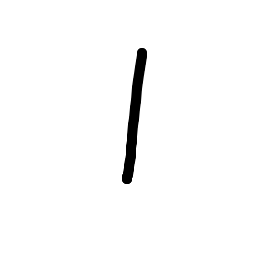

In [5]:
imgData

In [3]:
import re
imgstr = re.search(r'base64,(.*)',imgData).group(1)

In [4]:
imgstr

'iVBORw0KGgoAAAANSUhEUgAAARgAAAEYCAYAAACHjumMAAARd0lEQVR4Xu3db2iV9RvH8Wvrz8xFpemcZYVESFhm9m86sgdSElFKD4xgTRDBooiklFDzgWWRGhhBkRBhVkgRNIkw7VHWFski/zyQiCGF4Uj7h9mMcj++8ttQp7uu+3hf27nv632e7jrf7329ri8fzrZz7lPT29vbKzwQQAABB4EaAsZBlSURQOCEAAHDQUAAATcBAsaNloURQICA4QwggICbAAHjRsvCCCBAwHAGEEDATYCAcaNlYQQQIGA4Awgg4CZAwLjRsjACCBAwnAEEEHATIGDcaFkYAQQIGM4AAgi4CRAwbrQsjAACBAxnAAEE3AQIGDdaFkYAAQKGM4AAAm4CBIwbLQsjgAABwxlAAAE3AQLGjZaFEUCAgOEMIICAmwAB40bLwgggQMBwBhBAwE2AgHGjZWEEECBgOAMIIOAmQMC40bIwAggQMJwBBBBwEyBg3GhZGAEECBjOAAIIuAkQMG60LIwAAgQMZwABBNwECBg3WhZGAAEChjOAAAJuAgSMGy0LI4AAAcMZQAABNwECxo2WhRFAgIDhDCCAgJsAAeNGy8IIIEDAcAYQQMBNgIBxo2VhBBAgYDgDCCDgJkDAuNGyMAIIEDCcAQQQcBMgYNxoWRgBBAgYzgACCLgJEDButCyMAAIEDGcAAQTcBAgYN1oWRgABAoYzYBZYsmSJvPfee3Lw4METz2lsbJSWlhZZs2aNeQ0KYwkQMLHmXXG3zc3N0t7efsbnz5gxQ7766quK1+aJ5RUgYMo729w6e+GFF+S5554bdL1Us3z58tz2ZKFyCBAw5ZijaxfpV6Hu7u5B9xg3blz/r06uF8PihRIgYAo1ruG52NraWunt7R1085qaGjl+/PjwXCC7Vq0AAVO1o6meC0vhYXloIWRZg5pyCRAw5ZqnSzcEjAtriEUJmBBjrrzJQ4cOydixY00L8ArGxBSqiIA

In [10]:
import base64
imgdata = base64.b64decode(imgstr)
filename = 'some_image.jpg'  # I assume you have a way of picking unique filenames
with open(filename, 'wb') as f:
    f.write(imgdata)

In [14]:
print(imgdata)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x18\x00\x00\x01\x18\x08\x06\x00\x00\x00\x87\x8e\xe9\x8c\x00\x00\x11wIDATx^\xed\xddoh\x95\xf5\x1b\xc7\xf1k\xeb\xcf\xccE\xa5\xe9\x9ce\x85DHXf\xf6o:\xb2\x07R\x12QJ\x0f\x8c`M\x10\xc1\xa2\x88\xa4\x94P\xf3\x81e\x91\x1a\x18A\x91\x10aVH\x114\x890\xedQ\xd6\x16\xc9"\xff<\x90\x88!\x85\xe1H\xfb\x87\xd9\x8cr?\xbe\xf2\xdbP\xa7\xbb\xae\xfbx_\xdb\xb9\xef\xeb}\x9e\xee:\xdf\xef}\xbd\xae/\x1f\xce\xb6s\xeeS\xd3\xdb\xdb\xdb+<\x10@\x00\x01\x07\x81\x1a\x02\xc6A\x95%\x11@\xe0\x84\x00\x01\xc3A@\x00\x017\x01\x02\xc6\x8d\x96\x85\x11@\x80\x80\xe1\x0c \x80\x80\x9b\x00\x01\xe3F\xcb\xc2\x08 @\xc0p\x06\x10@\xc0M\x80\x80q\xa3ea\x04\x10 `8\x03\x08 \xe0&@\xc0\xb8\xd1\xb20\x02\x08\x100\x9c\x01\x04\x10p\x13 `\xdchY\x18\x01\x04\x08\x18\xce\x00\x02\x08\xb8\t\x100n\xb4,\x8c\x00\x02\x04\x0cg\x00\x01\x04\xdc\x04\x08\x187Z\x16F\x00\x01\x02\x863\x80\x00\x02n\x02\x04\x8c\x1b-\x0b#\x80\x00\x01\xc3\x19@\x00\x017\x01\x02\xc6\x8d\x96\x85\x11@\x80\x80\xe1\x0c \x80\x80\x9b\x00\x01\xe3F\